In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from ipywidgets import interactive
from IPython.display import display
from sklearn.model_selection import validation_curve,GridSearchCV
import time 

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = MLPClassifier(learning_rate_init=0.0001,random_state=52, max_iter=10000).fit(X_train, y_train)
proba_test = clf.predict_proba(X_test)
pre_train = clf.predict(X_train)
pre_test = clf.predict(X_test)
# print("pre:",pre_test)
# print("gt: ",y_test)
tp_train = (pre_train==y_train).sum()
tp_test = (pre_test==y_test).sum()
print("train acc: ",tp_train/len(y_train))
print("test acc: ",tp_test/len(y_test))



train acc:  1.0
test acc:  0.975


d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28608 (\N{CJK UNIFIED IDEOGRAPH-6FC0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27963 (\N{CJK UNIFIED IDEOGRAPH-6D3B}) missing from curren

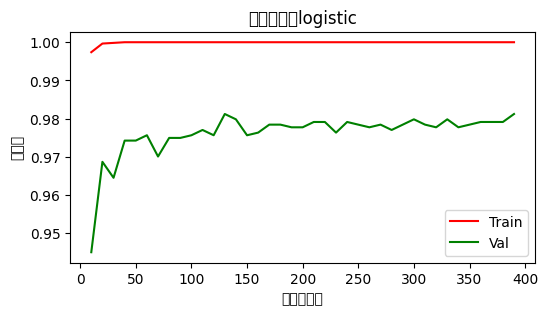

logistic time:  55.69250726699829


d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28608 (\N{CJK UNIFIED IDEOGRAPH-6FC0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27963 (\N{CJK UNIFIED IDEOGRAPH-6D3B}) missing from curren

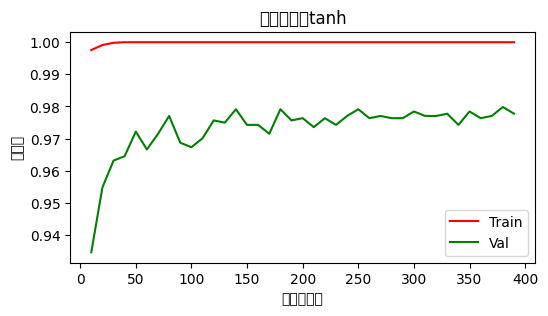

tanh time:  26.04598116874695


d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28608 (\N{CJK UNIFIED IDEOGRAPH-6FC0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\TDT\Develop_Env\Python 3.12.2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27963 (\N{CJK UNIFIED IDEOGRAPH-6D3B}) missing from curren

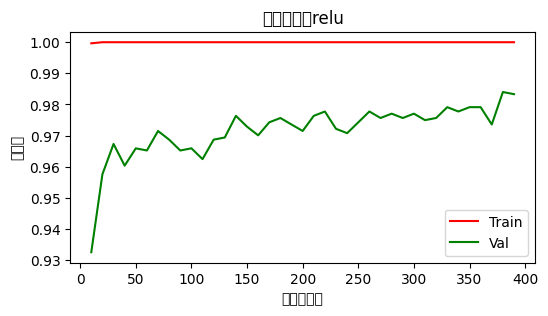

relu time:  20.246954202651978


In [2]:
clf = MLPClassifier(activation='logistic',random_state=2023, max_iter=1000)
param_range = np.arange(10,400,10)
start = time.time()
train_scores, val_scores = validation_curve(clf, X_train, y_train, param_name='hidden_layer_sizes', scoring='accuracy', \
                                            param_range=param_range, cv=5, n_jobs=-1)
end = time.time()
# Plot the validation curve
train_mean = np.mean(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)
plt.figure(figsize=(6, 3))
plt.plot( param_range, train_mean, color = 'r', label = 'Train')
plt.plot( param_range, val_mean,   color = 'g', label = 'Val')
plt.legend(loc='best')
plt.xlabel('神经元个数')
plt.ylabel('正确率')
plt.title('激活函数为logistic')
plt.show()
print("logistic time: ",end-start)

# 绘制出的两条曲线分别是训练集和验证集的准确率随着神经元个数的变化曲线，
# 随着神经元个数的增加，训练集的准确率一直在增加至1，但是验证集的准确率在达到一定值后就不再增加开始波动，出现过拟合现象。
# 由图也可以看到最优值可选为210左右
clf = MLPClassifier(activation='tanh',random_state=2023, max_iter=1000)
param_range = np.arange(10,400,10)
start = time.time()
train_scores, val_scores = validation_curve(clf, X_train, y_train, param_name='hidden_layer_sizes', scoring='accuracy', \
                                            param_range=param_range, cv=5, n_jobs=-1)
end = time.time()
# Plot the validation curve
train_mean = np.mean(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)
plt.figure(figsize=(6, 3))
plt.plot( param_range, train_mean, color = 'r', label = 'Train')
plt.plot( param_range, val_mean,   color = 'g', label = 'Val')
plt.legend(loc='best')
plt.xlabel('神经元个数')
plt.ylabel('正确率')
plt.title('激活函数为tanh')
plt.show()
print("tanh time: ",end-start)

clf = MLPClassifier(random_state=2023, max_iter=1000)   # 这里使用默认激活函数relu
param_range = np.arange(10,400,10)
start = time.time()
train_scores, val_scores = validation_curve(clf, X_train, y_train, param_name='hidden_layer_sizes', scoring='accuracy', \
                                            param_range=param_range, cv=5, n_jobs=-1)
end = time.time()
# Plot the validation curve
train_mean = np.mean(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)
plt.figure(figsize=(6, 3))
plt.plot( param_range, train_mean, color = 'r', label = 'Train')
plt.plot( param_range, val_mean,   color = 'g', label = 'Val')
plt.legend(loc='best')
plt.xlabel('神经元个数')
plt.ylabel('正确率')
plt.title('激活函数为relu')
plt.show()
print("relu time: ",end-start)
# 将激活函数更换为tanh（左）、logistic（右）的效果如下，折线图相对稳定一点。此外，选择这两种激活函数时消耗时间约为relu的1.5倍左右
# 综合来看，logistic作激活函数时，结果更加稳定、收敛更快，神经元数量在150时达到验证集准确率上限0.98

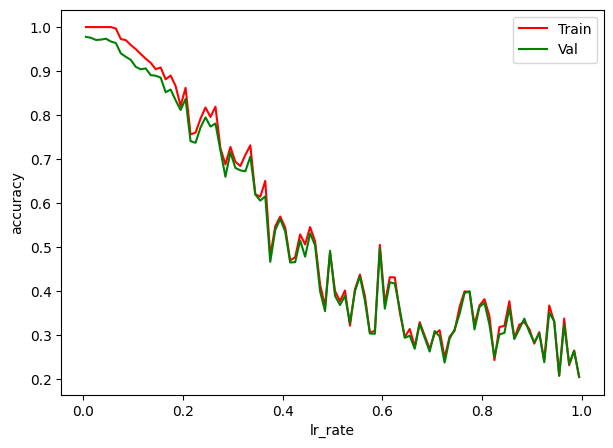

In [3]:
clf = MLPClassifier(activation='logistic',random_state=2023, max_iter=1000)
param_range = np.arange(0.005,1,0.01)

train_scores, val_scores = validation_curve(clf, X_train, y_train, param_name='learning_rate_init', scoring='accuracy', \
                                            param_range=param_range, cv=5, n_jobs=-1)
# Plot the validation curve
train_mean = np.mean(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)
plt.figure(figsize=(7, 5))
plt.plot(param_range, train_mean, color = 'r', label = 'Train')
plt.plot(param_range, val_mean,   color = 'g', label = 'Val')
# plt.xticks([0,1,2,3,4],['10e-5','10e-4','10e-3','10e-3','10e-1',])
plt.legend(loc='best')
plt.xlabel('lr_rate')
plt.ylabel('accuracy')
plt.show()


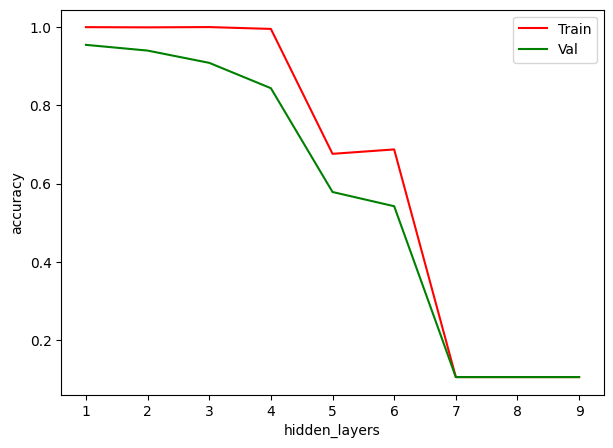

In [4]:
clf = MLPClassifier(activation='logistic',random_state=2023, max_iter=1000)
depth_range = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # 不同的隐藏层深度
# param_range_ = [[int(10)]*int(i) for i in param_range]
param_range = [(15,) * depth for depth in depth_range]
train_scores, val_scores = validation_curve(clf, X_train, y_train, param_name='hidden_layer_sizes', scoring='accuracy', \
                                            param_range=param_range, cv=5, n_jobs=-1)
# Plot the validation curve
train_mean = np.mean(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)
val_50 = val_mean
plt.figure(figsize=(7, 5))
plt.plot( depth_range, train_mean, color = 'r', label = 'Train')
plt.plot( depth_range, val_mean,   color = 'g', label = 'Val')
plt.legend(loc='best')
plt.xlabel('hidden_layers')
plt.ylabel('accuracy')
plt.show()



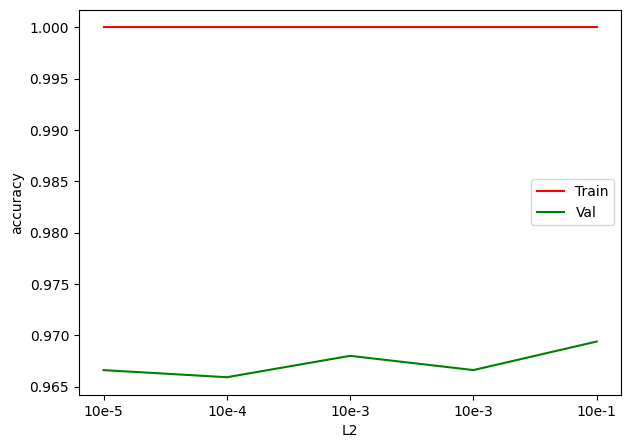

In [5]:
clf = MLPClassifier(activation='relu',random_state=2023, max_iter=1000)
param_range = np.logspace(-5,-1,5)
train_scores, val_scores = validation_curve(clf, X_train, y_train, param_name='alpha', scoring='accuracy', \
                                            param_range=param_range, cv=5, n_jobs=-1)
# Plot the validation curve
train_mean = np.mean(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)
plt.figure(figsize=(7, 5))
plt.plot( train_mean, color = 'r', label = 'Train')
plt.plot( val_mean,   color = 'g', label = 'Val')
plt.xticks([0,1,2,3,4],['10e-5','10e-4','10e-3','10e-3','10e-1',])
plt.legend(loc='best')
plt.xlabel('L2')
plt.ylabel('accuracy')
plt.show()

In [6]:
clf = MLPClassifier(random_state=1, max_iter=10000)
for layers in range(1,5):
    temp = np.arange(20,100,20).reshape(-1,1).tolist()
    param_range = [i*layers for i in temp]
    print(param_range)
    parameters = {'hidden_layer_sizes':param_range, }
                #   'learning_rate':[0.1]}
    GS = GridSearchCV(clf, parameters, cv=5, n_jobs=-1).fit(X_train, y_train)
    print("layers=",layers,GS.best_params_,GS.best_score_)

[[20], [40], [60], [80]]
layers= 1 {'hidden_layer_sizes': [80]} 0.9673006194347659
[[20, 20], [40, 40], [60, 60], [80, 80]]
layers= 2 {'hidden_layer_sizes': [80, 80]} 0.9777342237708091
[[20, 20, 20], [40, 40, 40], [60, 60, 60], [80, 80, 80]]
layers= 3 {'hidden_layer_sizes': [60, 60, 60]} 0.974961285327139
[[20, 20, 20, 20], [40, 40, 40, 40], [60, 60, 60, 60], [80, 80, 80, 80]]
layers= 4 {'hidden_layer_sizes': [80, 80, 80, 80]} 0.9735723964382501


In [7]:
clf = MLPClassifier(hidden_layer_sizes=220,alpha=0.0001,random_state=1, max_iter=10000).fit(X_train, y_train)
proba_test = clf.predict_proba(X_test)
pre_train = clf.predict(X_train)
pre_test = clf.predict(X_test)
# print("pre:",pre_test)
# print("gt: ",y_test)
tp_train = (pre_train==y_train).sum()
tp_test = (pre_test==y_test).sum()
print("train acc: ",tp_train/len(y_train))
print("test acc: ",tp_test/len(y_test))

train acc:  1.0
test acc:  0.9861111111111112


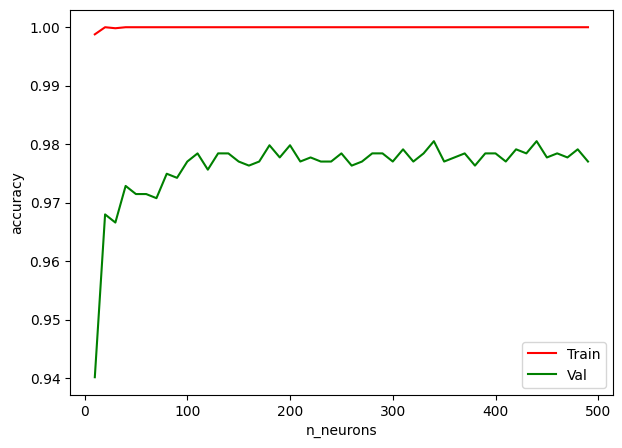

In [8]:
clf = MLPClassifier(activation='logistic',random_state=1, max_iter=10000)
param_range = np.arange(10,500,10)
train_scores, val_scores = validation_curve(clf, X_train, y_train, param_name='hidden_layer_sizes', scoring='accuracy', \
                                            param_range=param_range, cv=5, n_jobs=-1)
# Plot the validation curve
train_mean = np.mean(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)
plt.figure(figsize=(7, 5))
plt.plot( param_range, train_mean, color = 'r', label = 'Train')
plt.plot( param_range, val_mean,   color = 'g', label = 'Val')
plt.legend(loc='best')
plt.xlabel('n_neurons')
plt.ylabel('accuracy')
plt.show()

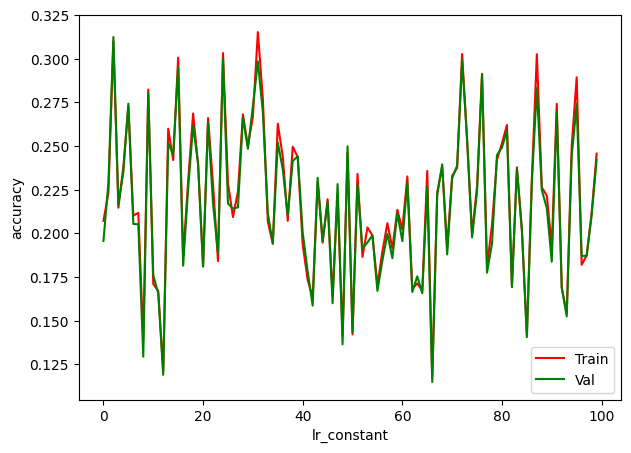

In [9]:
clf = MLPClassifier(activation='logistic',random_state=1, max_iter=10000)
param_range = np.logspace(-0.0001,-0.01,100)
train_scores, val_scores = validation_curve(clf, X_train, y_train, param_name='learning_rate_init', scoring='accuracy', \
                                            param_range=param_range, cv=5, n_jobs=-1)
# Plot the validation curve
train_mean = np.mean(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)
plt.figure(figsize=(7, 5))
plt.plot( train_mean, color = 'r', label = 'Train')
plt.plot( val_mean,   color = 'g', label = 'Val')
# plt.xticks([0,1,2,3,4],['10e-5','10e-4','10e-3','10e-3','10e-1',])
plt.legend(loc='best')
plt.xlabel('lr_constant')
plt.ylabel('accuracy')
plt.show()

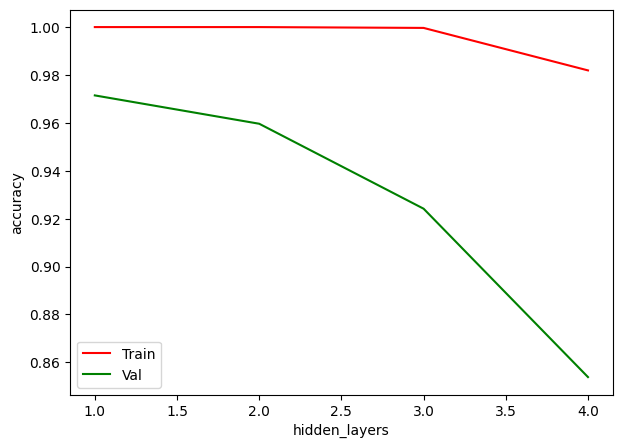

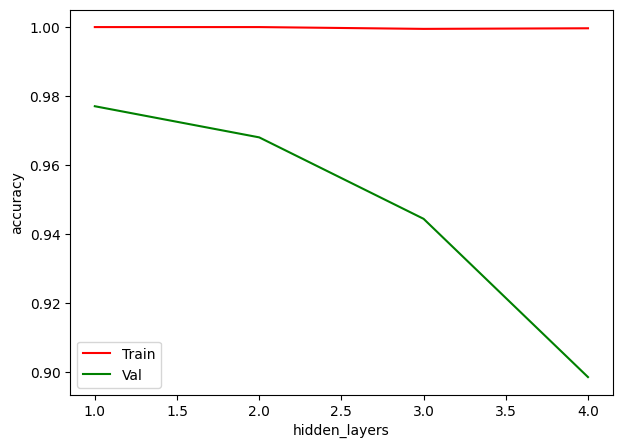

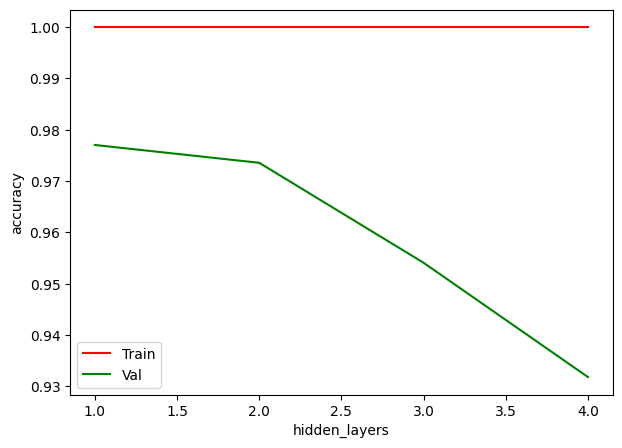

In [10]:
clf = MLPClassifier(activation='logistic',random_state=1, max_iter=10000)
param_range = np.arange(1,5)
param_range_ = [[int(50/i)]*int(i) for i in param_range]
train_scores, val_scores = validation_curve(clf, X_train, y_train, param_name='hidden_layer_sizes', scoring='accuracy', \
                                            param_range=param_range_, cv=5, n_jobs=-1)
# Plot the validation curve
train_mean = np.mean(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)
val_50 = val_mean
plt.figure(figsize=(7, 5))
plt.plot( param_range, train_mean, color = 'r', label = 'Train')
plt.plot( param_range, val_mean,   color = 'g', label = 'Val')
plt.legend(loc='best')
plt.xlabel('hidden_layers')
plt.ylabel('accuracy')
plt.show()

clf = MLPClassifier(activation='logistic',random_state=1, max_iter=10000)
param_range = np.arange(1,5)
param_range_ = [[int(100/i)]*int(i) for i in param_range]
train_scores, val_scores = validation_curve(clf, X_train, y_train, param_name='hidden_layer_sizes', scoring='accuracy', \
                                            param_range=param_range_, cv=5, n_jobs=-1)
# Plot the validation curve
train_mean = np.mean(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)
val_100 = val_mean
plt.figure(figsize=(7, 5))
plt.plot( param_range, train_mean, color = 'r', label = 'Train')
plt.plot( param_range, val_mean,   color = 'g', label = 'Val')
plt.legend(loc='best')
plt.xlabel('hidden_layers')
plt.ylabel('accuracy')
plt.show()

clf = MLPClassifier(activation='logistic',random_state=1, max_iter=10000)
param_range = np.arange(1,5)
param_range_ = [[int(150/i)]*int(i) for i in param_range]
train_scores, val_scores = validation_curve(clf, X_train, y_train, param_name='hidden_layer_sizes', scoring='accuracy', \
                                            param_range=param_range_, cv=5, n_jobs=-1)
# Plot the validation curve
train_mean = np.mean(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)
val_150 = val_mean
plt.figure(figsize=(7, 5))
plt.plot( param_range, train_mean, color = 'r', label = 'Train')
plt.plot( param_range, val_mean,   color = 'g', label = 'Val')
plt.legend(loc='best')
plt.xlabel('hidden_layers')
plt.ylabel('accuracy')
plt.show()


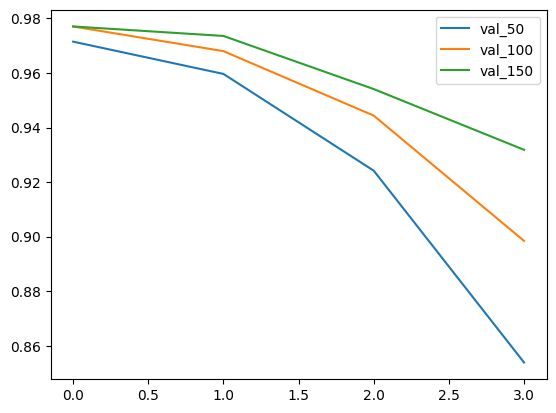

In [11]:
plt.plot(val_50,label='val_50')
plt.plot(val_100,label='val_100')
plt.plot(val_150,label='val_150')
plt.legend(loc='best')
plt.show()

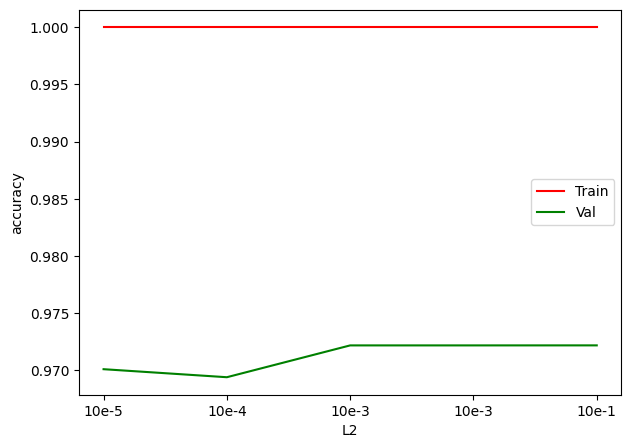

In [12]:
clf = MLPClassifier(activation='relu',random_state=1, max_iter=10000)
param_range = np.logspace(-5,-1,5)
train_scores, val_scores = validation_curve(clf, X_train, y_train, param_name='alpha', scoring='accuracy', \
                                            param_range=param_range, cv=5, n_jobs=-1)
# Plot the validation curve
train_mean = np.mean(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)
plt.figure(figsize=(7, 5))
plt.plot( train_mean, color = 'r', label = 'Train')
plt.plot( val_mean,   color = 'g', label = 'Val')
plt.xticks([0,1,2,3,4],['10e-5','10e-4','10e-3','10e-3','10e-1',])
plt.legend(loc='best')
plt.xlabel('L2')
plt.ylabel('accuracy')
plt.show()